# Biblioteca

In [5]:
import pandas as pd
import sklearn
import numpy as np
import statsmodels 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [114]:
sns.set(rc={'figure.figsize':(12,7)})
sns.set_style("whitegrid")
sns.set_palette("husl")

# Dados

In [7]:
# Removendo outliers e substituindo nulos pela média

def fix_nulls_and_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    v=1.5
    
    df_no_out = (df[["id", column]]
    .assign(**{column: lambda df: np.where(df[column] == -1, np.nan, df[column])}) ## corrigir nulos
    .assign(**{column+"_no_out": lambda df: np.where((df[column] > (Q3 + (v * IQR))), (Q3 + (v * IQR)), df[column])})
    .assign(**{column+"_no_out": lambda df: np.where((df[column] < (Q1 - (v * IQR))), (Q1 - (v * IQR)), df[column+"_no_out"])})
    .assign(**{column+"_no_out": lambda df: np.where(df[column+"_no_out"].isnull(), df[column+"_no_out"].mean(), df[column+"_no_out"])}) ## corrigir nulos
    .drop([column], 1))
    return df_no_out

In [111]:
# dados_raw = pd.read_csv("porto_seguro.csv")

remover_outliers_ps_reg_03 = fix_nulls_and_outliers(dados_raw, "ps_reg_03")
remover_outliers_ps_car_12 = fix_nulls_and_outliers(dados_raw, "ps_car_12")
remover_outliers_ps_car_13 = fix_nulls_and_outliers(dados_raw, "ps_car_13")
remover_outliers_ps_car_14 = fix_nulls_and_outliers(dados_raw, "ps_car_14")

dados = (
    dados_raw
    ## tratando nulos em variável ordinal --> substituir pela moda
    .assign(ps_car_11 = lambda x: np.where(x.ps_car_11 == -1, x[x.ps_car_11 != -1].ps_car_11.mode(), x.ps_car_11))
    ## realizando agrupamento de variáveis categóricas e criando dummies
    ### ps_car_07_cat
    .assign(ps_car_07_cat_null = lambda x: np.where(x.ps_car_07_cat == -1, 1, 0))
    .assign(ps_car_07_cat_1 = lambda x: np.where(x.ps_car_07_cat == 1, 1, 0))
    ### ps_car_05_cat
    .assign(ps_car_05_cat_null = lambda x: np.where(x.ps_car_05_cat == -1, 1, 0))
    .assign(ps_car_05_cat_1 = lambda x: np.where(x.ps_car_05_cat == 1, 1, 0))
    ### ps_car_03_cat
    .assign(ps_car_03_cat_null = lambda x: np.where(x.ps_car_03_cat == -1, 1, 0))
    .assign(ps_car_03_cat_1 = lambda x: np.where(x.ps_car_03_cat ==  1, 1, 0))
    ### ps_car_02_cat
    .assign(ps_car_02_cat_null = lambda x: np.where(x.ps_car_02_cat == -1, 1, 0))
    .assign(ps_car_02_cat_1 = lambda x: np.where(x.ps_car_02_cat == 1, 1, 0))
    ### ps_ind_04_cat
    .assign(ps_ind_04_cat_null = lambda x: np.where(x.ps_ind_04_cat == -1, 1, 0))
    .assign(ps_ind_04_cat_1 = lambda x: np.where(x.ps_ind_04_cat == 1, 1, 0))
    ### ps_ind_02_cat
    .assign(ps_ind_02_cat_null = lambda x: np.where(x.ps_ind_02_cat == -1, 1, 0))
    .assign(ps_ind_02_cat_1 = lambda x: np.where(x.ps_ind_02_cat == 1, 1, 0))
    .assign(ps_ind_02_cat_2_3_4 = lambda x: np.where(x.ps_ind_02_cat.isin([2, 3, 4]), 1, 0))
    ### ps_ind_05_cat
    .assign(ps_ind_05_cat_0 = lambda x: np.where(x.ps_ind_05_cat == 0, 1, 0))
    .assign(ps_ind_05_cat_1_3_4_5_6 = lambda x: np.where(x.ps_ind_05_cat.isin([1, 3, 4, 5, 6]), 1, 0))
    .assign(ps_ind_05_cat_2 = lambda x: np.where(x.ps_ind_05_cat == 2, 1, 0))
    .assign(ps_ind_05_cat_null = lambda x: np.where(x.ps_ind_05_cat == -1, 1, 0)) 
    ### ps_car_01_cat
    .assign(ps_car_01_cat_6_7 = lambda x: np.where(x.ps_car_01_cat.isin([6, 7]), 1, 0))
    .assign(ps_car_01_cat_3_4_5_10 = lambda x: np.where(x.ps_car_01_cat.isin([3, 4, 5, 10]), 1, 0))
    .assign(ps_car_01_cat_0_1_2_8_11 = lambda x: np.where(x.ps_car_01_cat.isin([0, 1, 2, 8, 11]), 1, 0))
    .assign(ps_car_01_cat_9 = lambda x: np.where(x.ps_car_01_cat == 9, 1, 0))
    .assign(ps_car_01_cat_null = lambda x: np.where(x.ps_car_01_cat == -1, 1, 0)) 
    ### ps_car_04_cat
    .assign(ps_car_04_cat_0_4 = lambda x: np.where(x.ps_car_04_cat.isin([0, 4]), 1, 0))
    .assign(ps_car_04_cat_1_2 = lambda x: np.where(x.ps_car_04_cat.isin([1, 2]), 1, 0))
    .assign(ps_car_04_cat_3_8 = lambda x: np.where(x.ps_car_04_cat.isin([3, 8]), 1, 0))
    .assign(ps_car_04_cat_6_9 = lambda x: np.where(x.ps_car_04_cat.isin([6, 9]), 1, 0))
    .assign(ps_car_04_cat_5_7 = lambda x: np.where(x.ps_car_04_cat.isin([5, 7]), 1, 0)) 
    ### ps_car_06_cat
    .assign(ps_car_06_cat_0_1_3_4_6_7_11_14 = lambda x: np.where(x.ps_car_06_cat.isin([0, 1, 3, 4, 6, 7, 11, 14]), 1, 0))
    .assign(ps_car_06_cat_10_12_15_16 = lambda x: np.where(x.ps_car_06_cat.isin([10, 12, 15, 16]), 1, 0))
    .assign(ps_car_06_cat_2_5_8_17 = lambda x: np.where(x.ps_car_06_cat.isin([2, 5, 8, 17]), 1, 0))
    .assign(ps_car_06_cat_9_13 = lambda x: np.where(x.ps_car_06_cat.isin([9, 13]), 1, 0)) 
    ### ps_car_09_cat
    .assign(ps_car_09_cat_0_2_3 = lambda x: np.where(x.ps_car_09_cat.isin([0, 2, 3]), 1, 0))
    .assign(ps_car_09_cat_1_4 = lambda x: np.where(x.ps_car_09_cat.isin([1, 4]), 1, 0))
    .assign(ps_car_09_cat_null = lambda x: np.where(x.ps_car_09_cat == -1, 1, 0)) 
    ###  ps_car_11_cat
    .assign(ps_car_11_cat_A = lambda x: np.where(x.ps_car_11_cat.isin([43, 99, 57, 19, 32, 39, 7, 10, 16, 82, 66, 44, 67, 103, 95, 11, 9, 42, 64, 62, 88, 53, 37, 48, 84]), 1, 0))
    .assign(ps_car_11_cat_B = lambda x: np.where(x.ps_car_11_cat.isin([46, 14, 1, 47, 81, 25, 5, 28, 54, 35, 50, 45, 79, 20, 104, 90, 17, 89]), 1, 0))
    .assign(ps_car_11_cat_C = lambda x: np.where(x.ps_car_11_cat.isin([94, 13, 3, 69, 100, 61, 71, 33, 56, 55, 72, 21, 93, 97, 63, 4, 58, 75, 18, 41]), 1, 0))
    .assign(ps_car_11_cat_D = lambda x: np.where(x.ps_car_11_cat.isin([74, 30, 65, 98, 38, 60, 87, 85, 49, 96, 52, 22, 77, 86, 102, 26, 76, 40, 68, 15, 27, 73, 59, 29, 92, 34, 6, 51, 8, 70, 2, 101, 23, 31, 12, 78, 36, 24, 83, 80, 91] ), 1, 0)) 
    ## removendo outliers em variáveis contínuas e substituindo nulos pela média
    .merge(remover_outliers_ps_reg_03, on="id", how="left")
    .merge(remover_outliers_ps_car_12, on="id", how="left")
    .merge(remover_outliers_ps_car_13, on="id", how="left")
    .merge(remover_outliers_ps_car_14, on="id", how="left")
    
    .drop(["ps_ind_02_cat", # variável modificada
           "ps_ind_05_cat", # variável modificada
           "ps_car_01_cat", # variável modificada
           "ps_car_04_cat", # variável modificada
           "ps_car_06_cat", # variável modificada
           "ps_car_09_cat", # variável modificada
           "ps_car_11_cat", # variável modificada
           "ps_reg_03",     # variável modificada
           "ps_car_12",     # variável modificada
           "ps_car_13",     # variável modificada
           "ps_car_14",     # variável modificada
           "ps_ind_04_cat", # variável modificada
           "ps_car_02_cat", # variável modificada
           "ps_car_03_cat", # variável modificada
           "ps_car_05_cat", # variável modificada
           "ps_car_07_cat", # variável modificada
           "ps_ind_02_cat_1",    # excluída por redundância
           "ps_ind_05_cat_null", # excluída por redundância
           "ps_car_01_cat_null", # excluída por redundância e falta de significância estatística
           "ps_car_04_cat_5_7",  # excluída por redundância
           "ps_car_06_cat_9_13", # excluída por redundância
           "ps_car_09_cat_null", # excluída por redundância
           "ps_car_11_cat_D",    # excluída por redundância
           "ps_ind_04_cat_null",      # excluída por falta de significância estatística
           "ps_car_02_cat_null",      # excluída por falta de significância estatística
           "ps_ind_10_bin", # excluída por falta de significância estatística
           "ps_ind_11_bin", # excluída por falta de significância estatística
           "ps_ind_13_bin", # excluída por falta de significância estatística
           "ps_car_10_cat"  # excluída por falta de significância estatística
          ], 1)
        )

In [98]:
check = dados_raw.replace(-1, np.NaN)
total = check.isnull().sum().sort_values(ascending=False) 
percent = (check.isnull().sum()/check.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# conferindo dados faltantes na base raw
missing_data.head(15)

,Total,Percent
ps_car_03_cat,411231,0.690898
ps_car_05_cat,266551,0.447825
ps_reg_03,107772,0.181065
ps_car_14,42620,0.071605
ps_car_07_cat,11489,0.019302
ps_ind_05_cat,5809,0.009760
ps_car_09_cat,569,0.000956
ps_ind_02_cat,216,0.000363
ps_car_01_cat,107,0.000180
ps_ind_04_cat,83,0.000139


In [112]:
check = dados.replace(-1, np.NaN)
total = check.isnull().sum().sort_values(ascending=False) 
percent = (check.isnull().sum()/check.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# conferindo se há dados faltantes
missing_data.head()

,Total,Percent
ps_car_14_no_out,0,0.0
ps_car_13_no_out,0,0.0
ps_calc_01,0,0.0
ps_calc_02,0,0.0
ps_calc_03,0,0.0


In [96]:
dados.drop(["id"], 1).describe().T

,count,mean,std,min,25%,50%,75%,max
target,595212.0,0.036448,0.187401,0.000000,0.000000,0.000000,0.000000,1.000000
ps_ind_01,595212.0,1.900378,1.983789,0.000000,0.000000,1.000000,3.000000,7.000000
ps_ind_03,595212.0,4.423318,2.699902,0.000000,2.000000,4.000000,6.000000,11.000000
ps_ind_06_bin,595212.0,0.393742,0.488579,0.000000,0.000000,0.000000,1.000000,1.000000
ps_ind_07_bin,595212.0,0.257033,0.436998,0.000000,0.000000,0.000000,1.000000,1.000000
ps_ind_08_bin,595212.0,0.163921,0.370205,0.000000,0.000000,0.000000,0.000000,1.000000
ps_ind_09_bin,595212.0,0.185304,0.388544,0.000000,0.000000,0.000000,0.000000,1.000000
ps_ind_12_bin,595212.0,0.009439,0.096693,0.000000,0.000000,0.000000,0.000000,1.000000
ps_ind_14,595212.0,0.012451,0.127545,0.000000,0.000000,0.000000,0.000000,4.000000
ps_ind_15,595212.0,7.299922,3.546042,0.000000,5.000000,7.000000,10.000000,13.000000


In [100]:
dados.dtypes

id                                   int64
target                               int64
ps_ind_01                            int64
ps_ind_03                            int64
ps_ind_06_bin                        int64
ps_ind_07_bin                        int64
ps_ind_08_bin                        int64
ps_ind_09_bin                        int64
ps_ind_12_bin                        int64
ps_ind_14                            int64
ps_ind_15                            int64
ps_ind_16_bin                        int64
ps_ind_17_bin                        int64
ps_ind_18_bin                        int64
ps_reg_01                          float64
ps_reg_02                          float64
ps_car_08_cat                        int64
ps_car_11                          float64
ps_car_15                          float64
ps_calc_01                         float64
ps_calc_02                         float64
ps_calc_03                         float64
ps_calc_04                           int64
ps_calc_05 

In [12]:
dados.groupby("target").id.nunique().reset_index()

,target,id
0,0,573518
1,1,21694


# Variáveis Categóricas e Binárias

Text(0.5,1,'Percentagem de sinistros por ps_ind_02_cat_2_3_4')

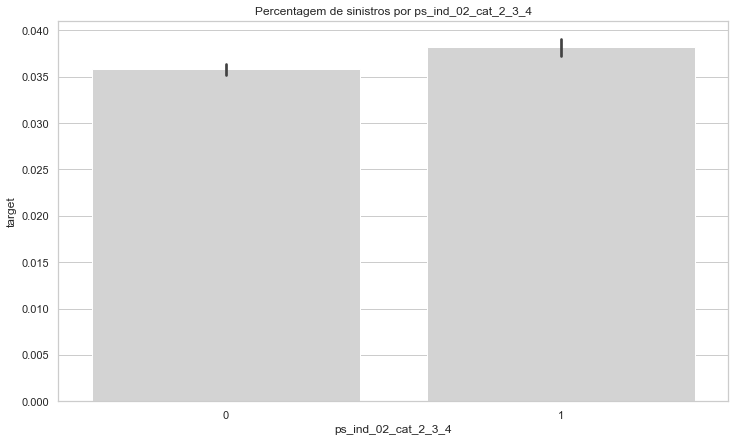

In [15]:
var = "ps_ind_02_cat_2_3_4"

data = dados[dados[var] != -1]

ax = sns.barplot(x=var, y="target", data=data, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_ind_02_cat_null')

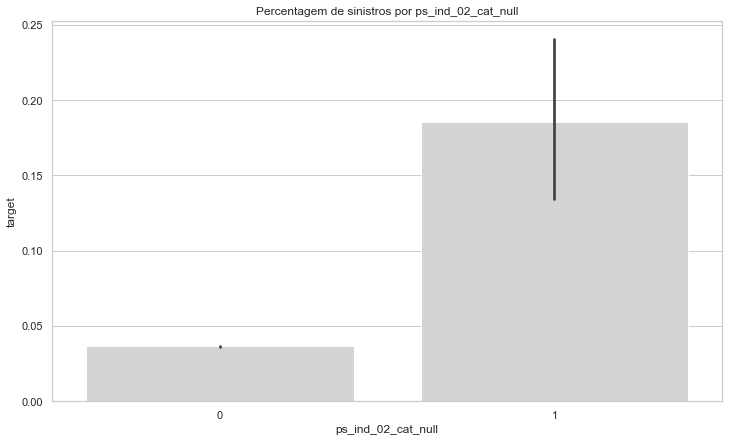

In [16]:
var = "ps_ind_02_cat_null"

data = dados[dados[var] != -1]

ax = sns.barplot(x=var, y="target", data=data, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_ind_04_cat_1')

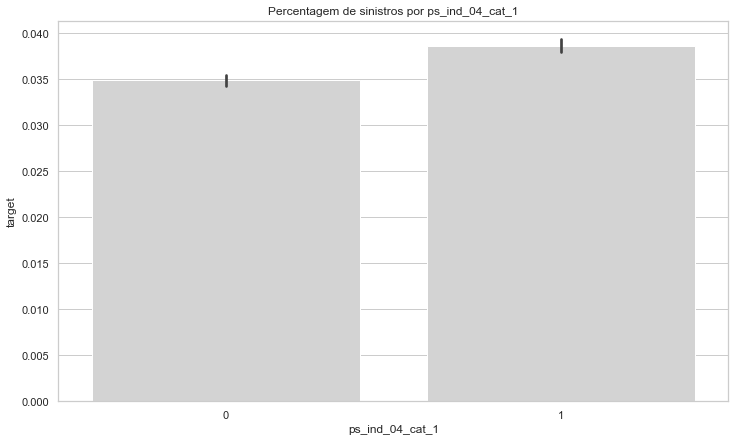

In [17]:
var = "ps_ind_04_cat_1"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_ind_05_cat_0')

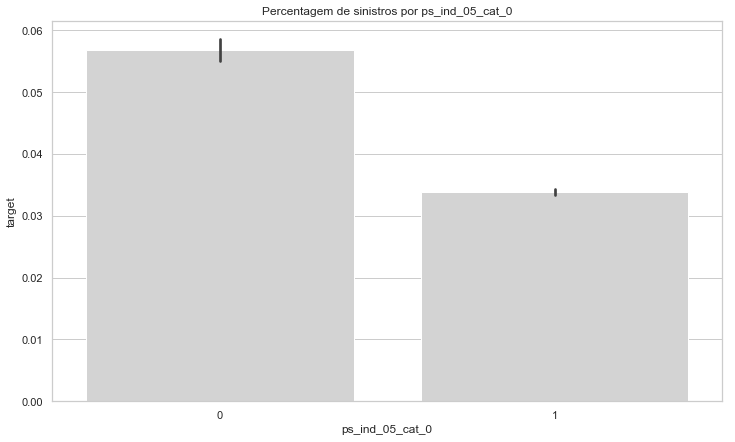

In [18]:
var = "ps_ind_05_cat_0"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_ind_05_cat_1_3_4_5_6')

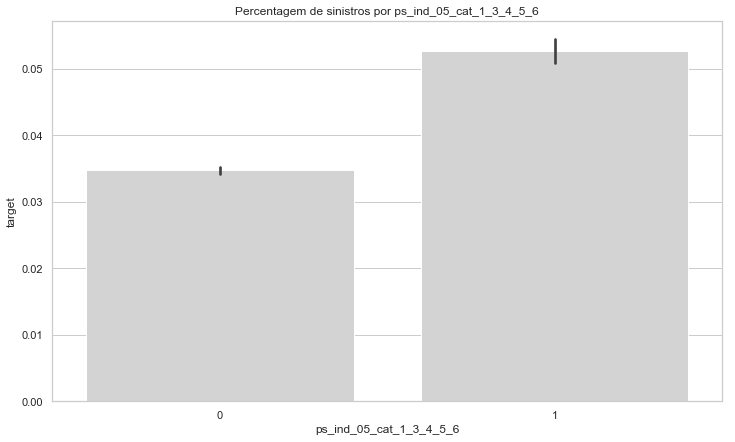

In [19]:
var = "ps_ind_05_cat_1_3_4_5_6"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_ind_05_cat_2')

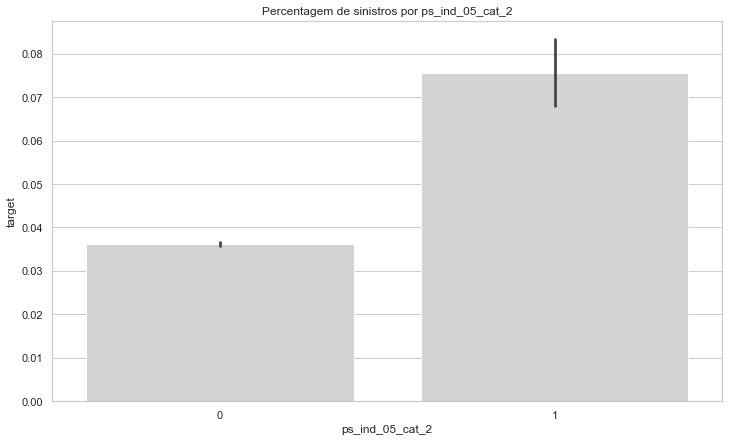

In [20]:
var = "ps_ind_05_cat_2"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_ind_06_bin')

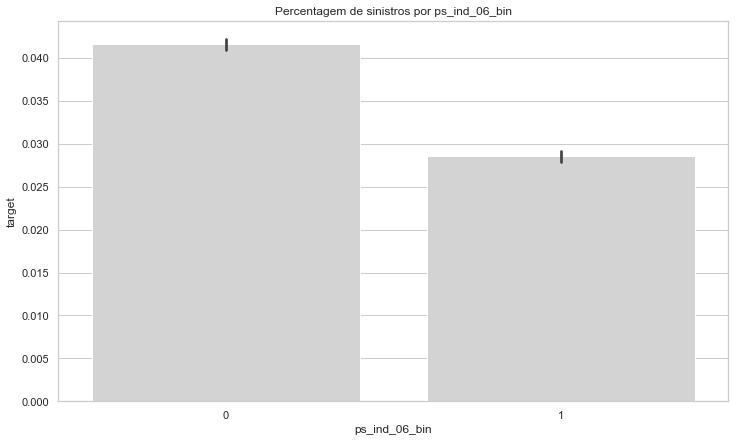

In [21]:
var = "ps_ind_06_bin"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_ind_07_bin')

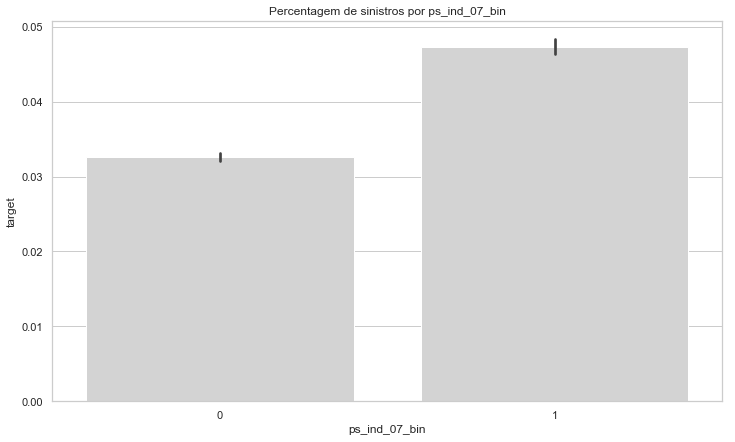

In [22]:
var = "ps_ind_07_bin"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_ind_08_bin')

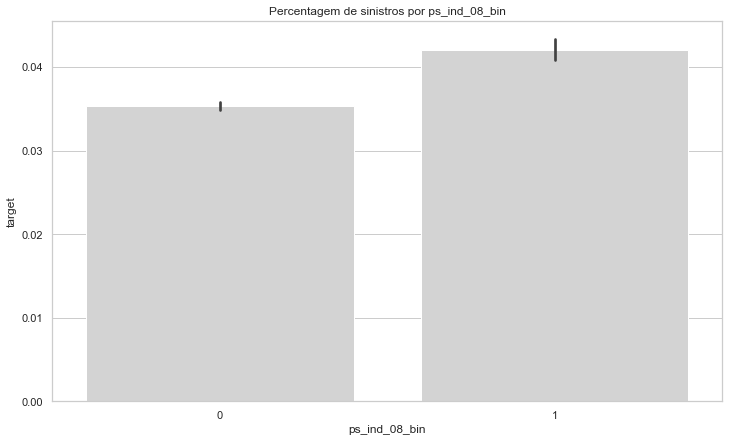

In [23]:
var = "ps_ind_08_bin"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_ind_09_bin')

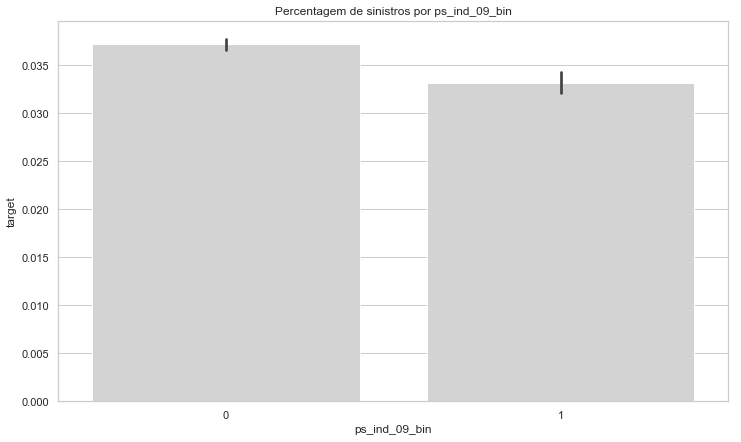

In [24]:
var = "ps_ind_09_bin"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_ind_12_bin')

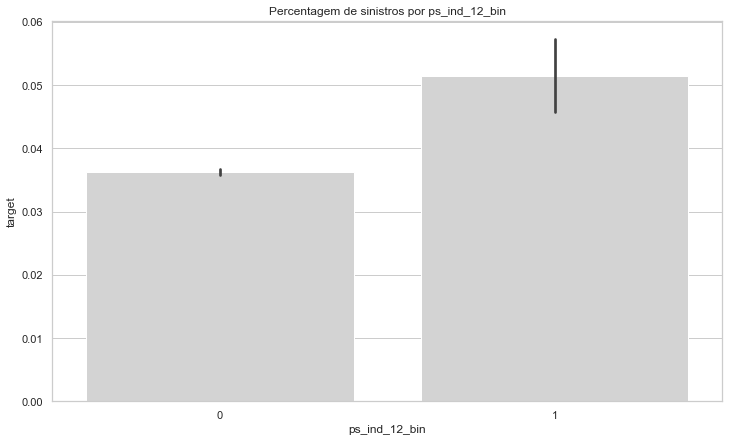

In [25]:
var = "ps_ind_12_bin"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_ind_16_bin')

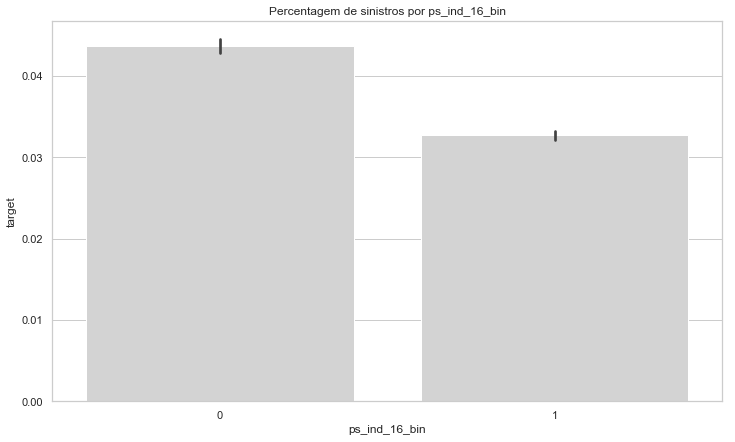

In [26]:
var = "ps_ind_16_bin"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_ind_17_bin')

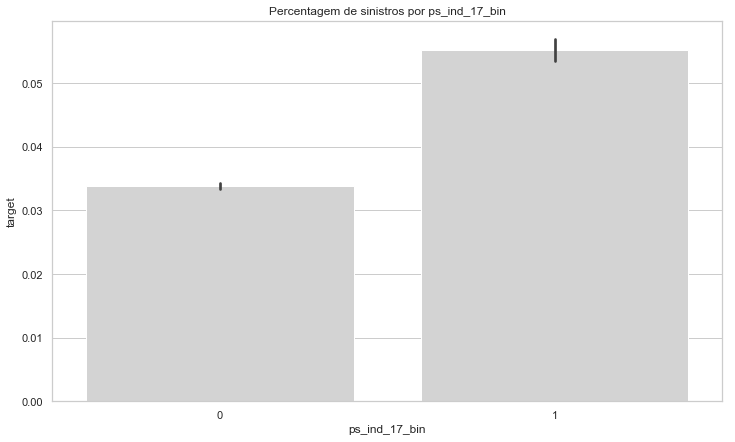

In [27]:
var = "ps_ind_17_bin"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_ind_18_bin')

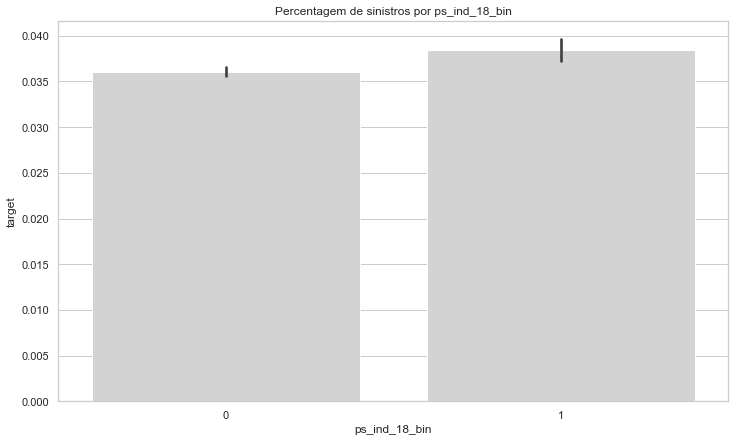

In [28]:
var = "ps_ind_18_bin"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_car_01_cat_6_7')

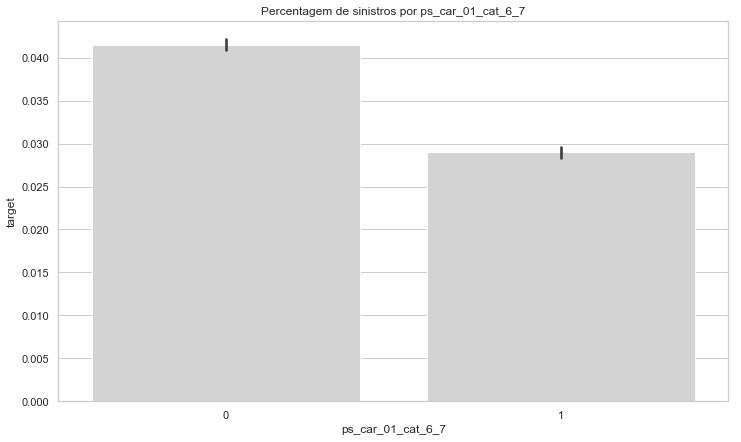

In [29]:
var = "ps_car_01_cat_6_7"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_car_01_cat_3_4_5_10')

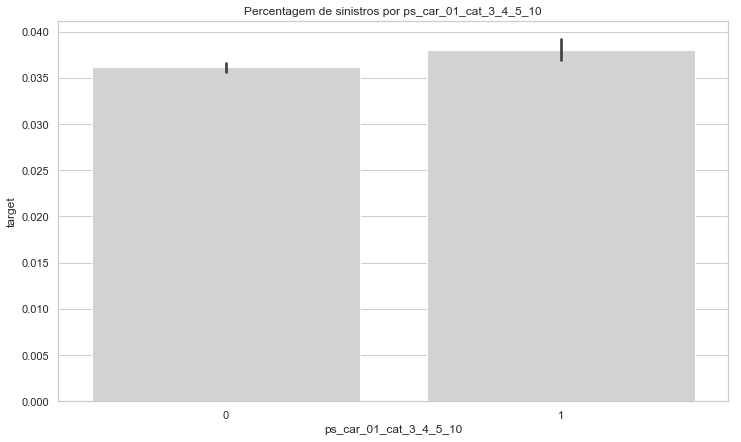

In [30]:
var = "ps_car_01_cat_3_4_5_10"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_car_01_cat_0_1_2_8_11')

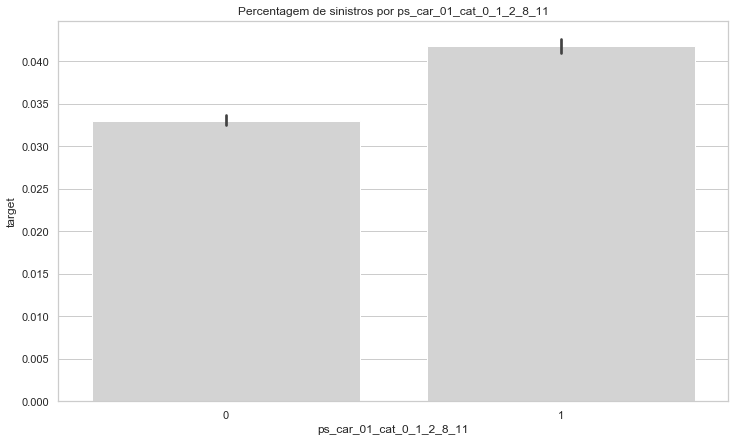

In [31]:
var = "ps_car_01_cat_0_1_2_8_11"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_car_01_cat_9')

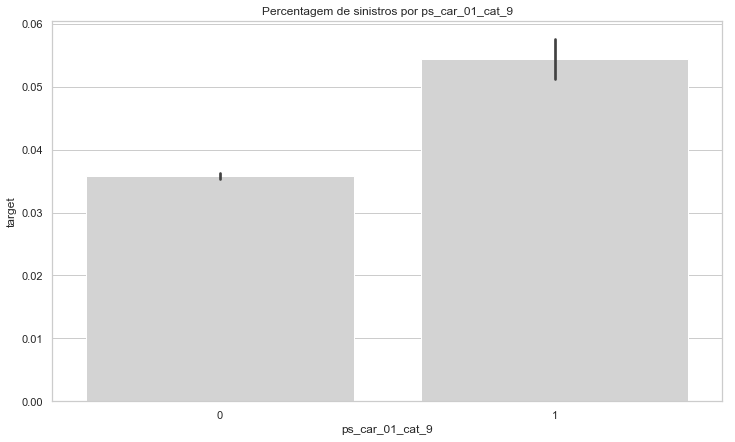

In [32]:
var = "ps_car_01_cat_9"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_car_02_cat_1')

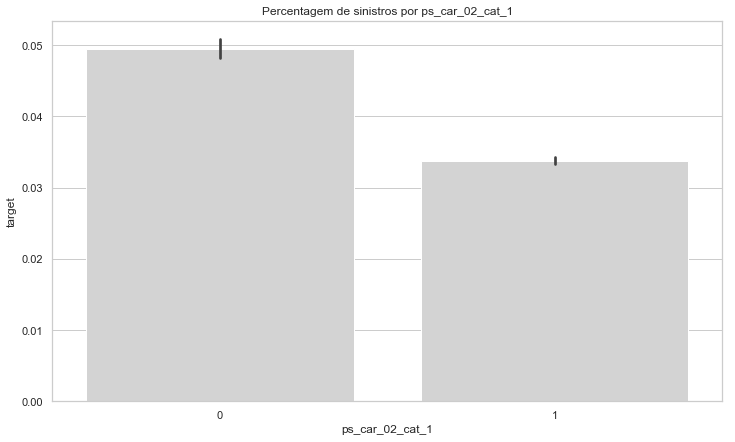

In [33]:
var = "ps_car_02_cat_1"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_car_03_cat_1')

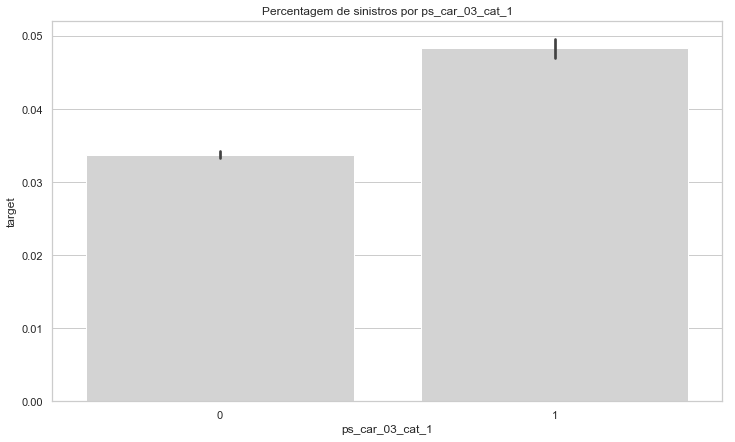

In [34]:
var = "ps_car_03_cat_1"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_car_03_cat_null')

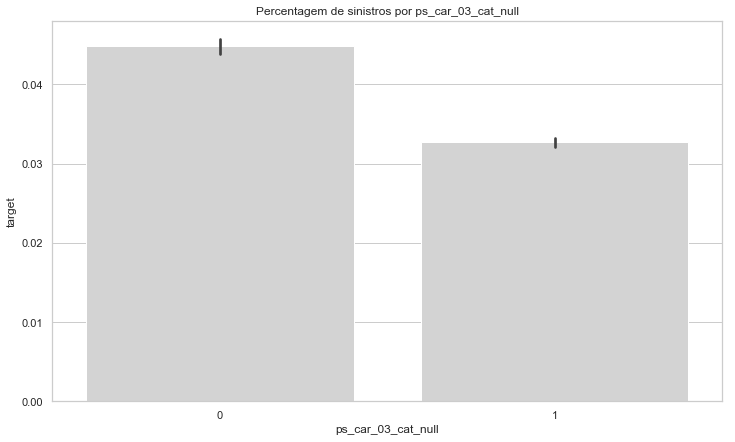

In [35]:
var = "ps_car_03_cat_null"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_car_04_cat_0_4')

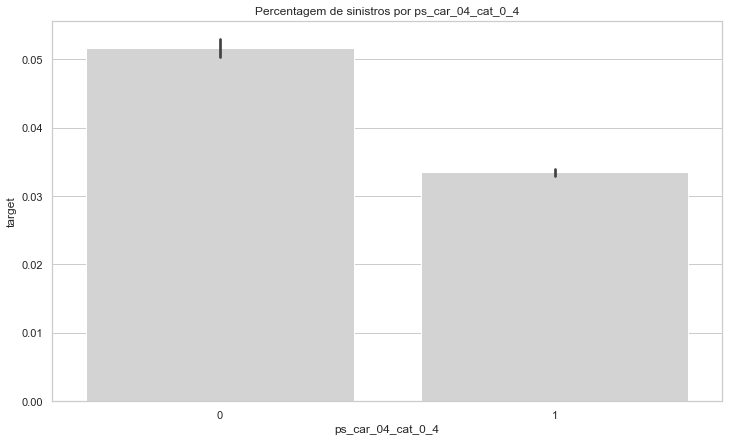

In [36]:
var = "ps_car_04_cat_0_4"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_car_04_cat_1_2')

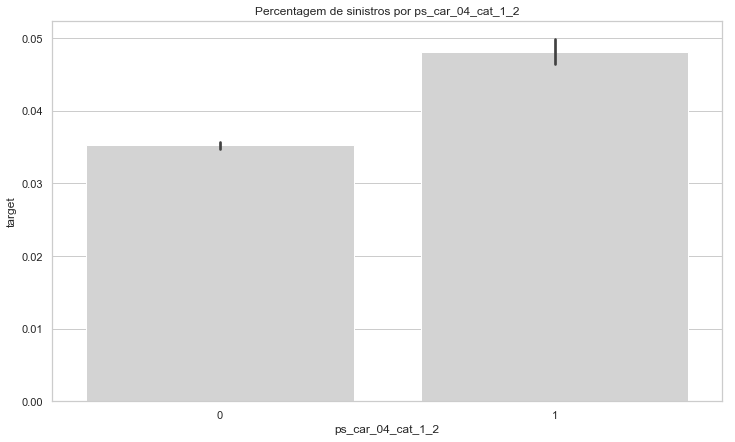

In [37]:
var = "ps_car_04_cat_1_2"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_car_04_cat_3_8')

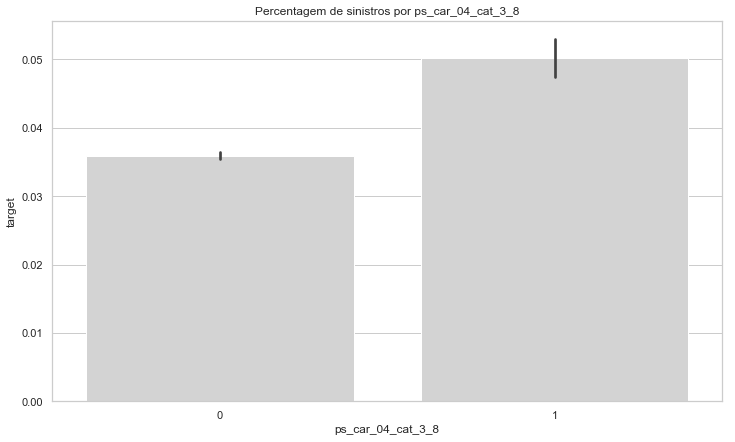

In [38]:
var = "ps_car_04_cat_3_8"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_car_04_cat_6_9')

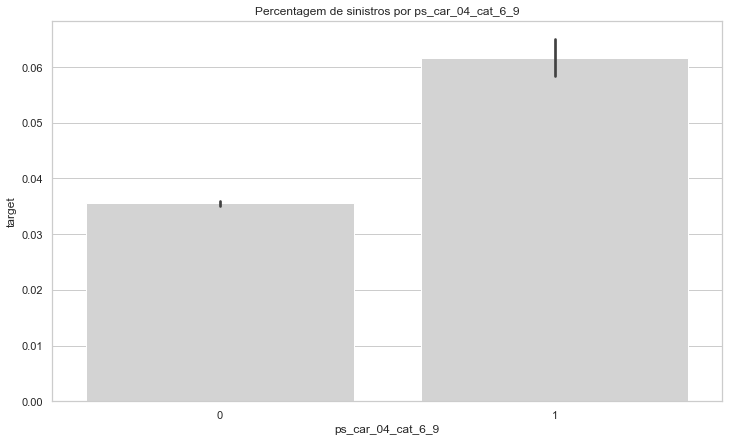

In [39]:
var = "ps_car_04_cat_6_9"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_car_05_cat_1')

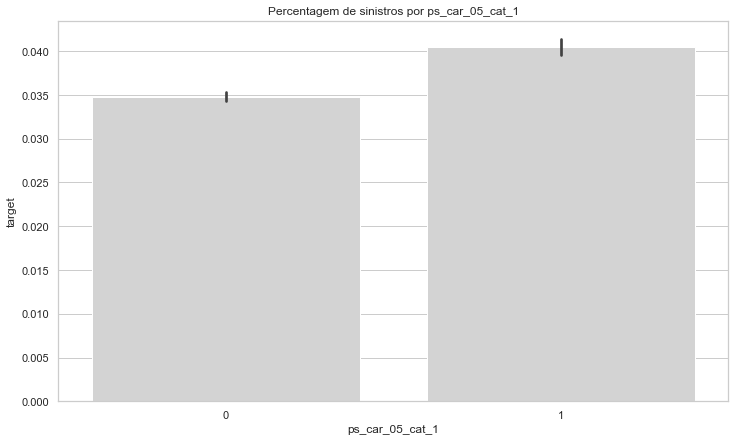

In [40]:
var = "ps_car_05_cat_1"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_car_05_cat_null')

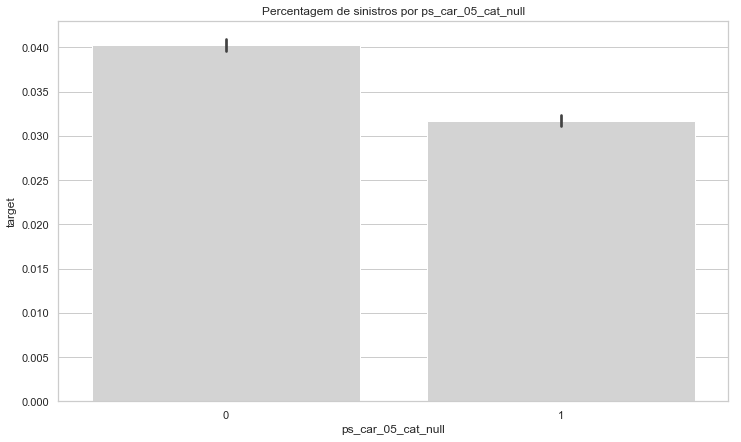

In [41]:
var = "ps_car_05_cat_null"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_car_06_cat_0_1_3_4_6_7_11_14')

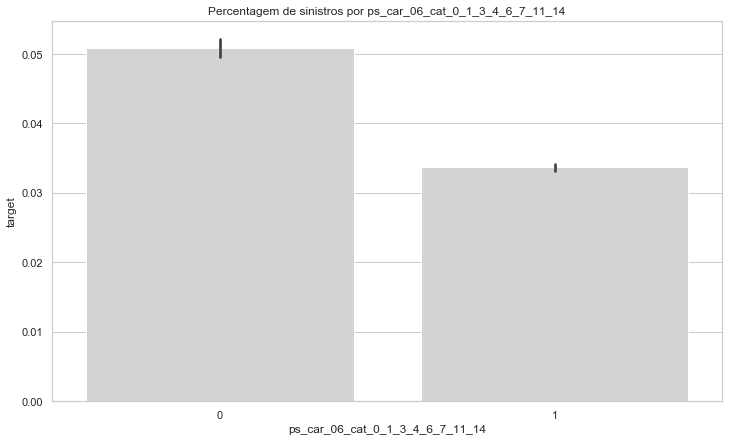

In [42]:
var = "ps_car_06_cat_0_1_3_4_6_7_11_14"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_car_06_cat_10_12_15_16')

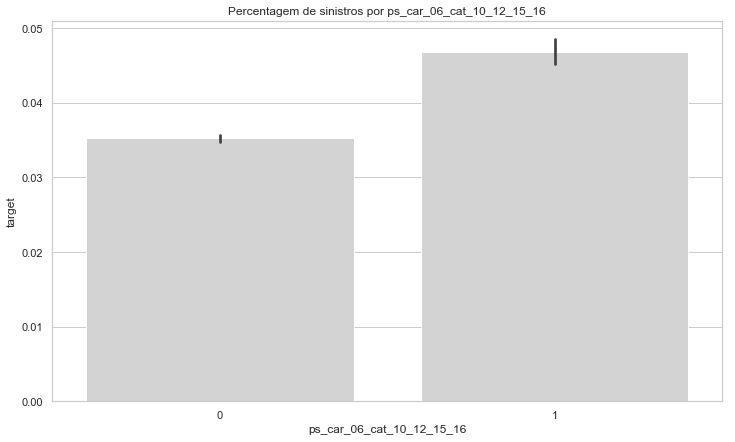

In [43]:
var = "ps_car_06_cat_10_12_15_16"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_car_06_cat_2_5_8_17')

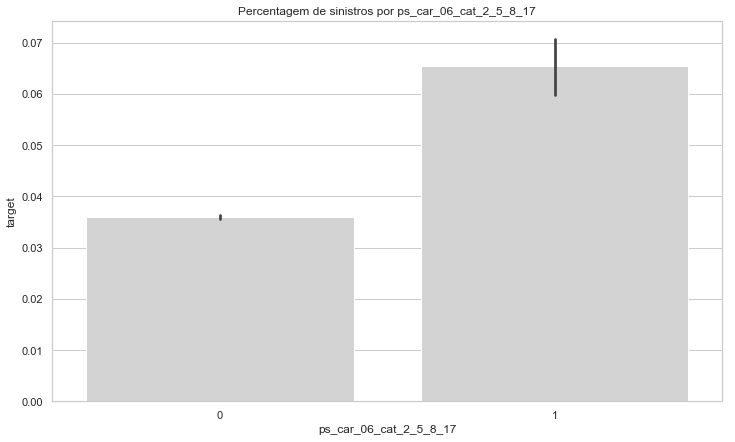

In [44]:
var = "ps_car_06_cat_2_5_8_17"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_car_07_cat_1')

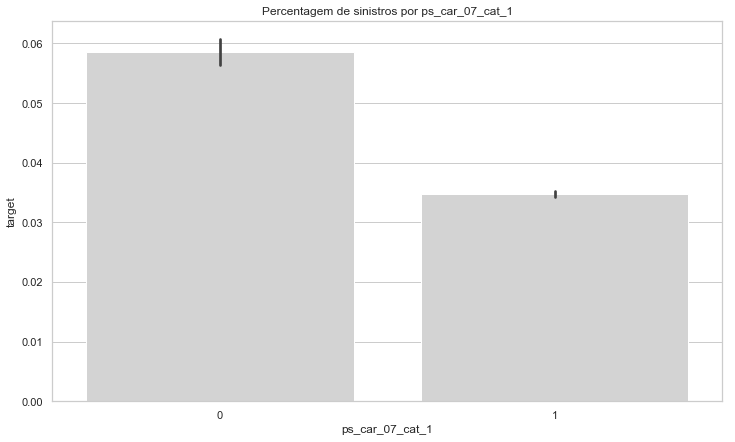

In [45]:
var = "ps_car_07_cat_1"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_car_07_cat_null')

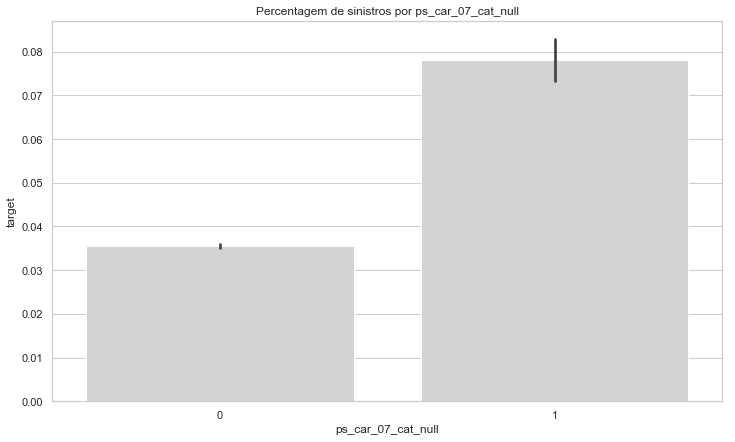

In [46]:
var = "ps_car_07_cat_null"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_car_08_cat')

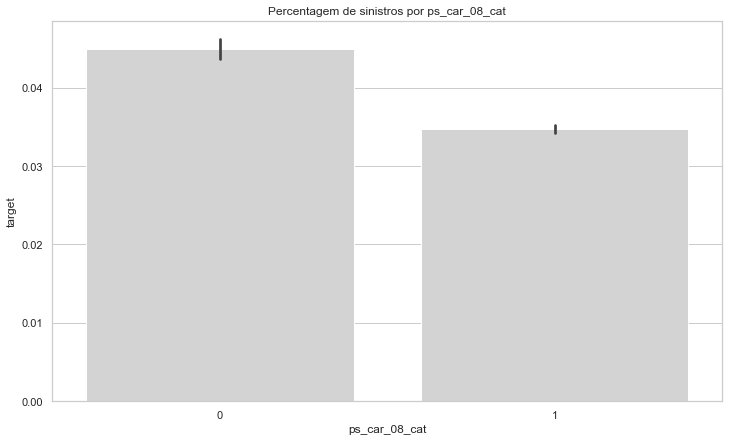

In [47]:
var = "ps_car_08_cat"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_car_09_cat_0_2_3')

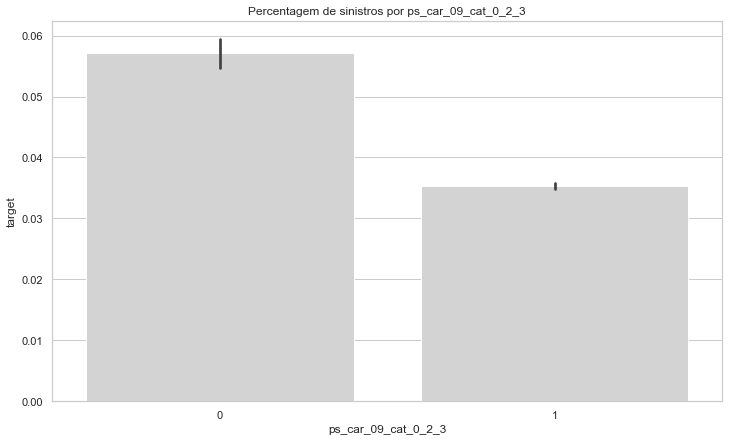

In [50]:
var = "ps_car_09_cat_0_2_3"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_calc_15_bin')

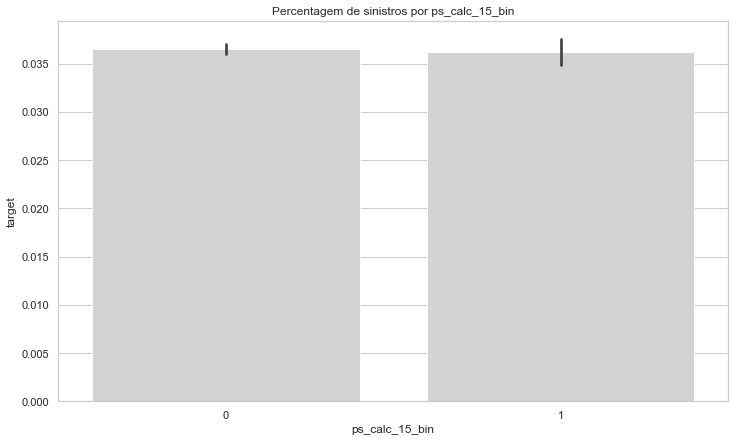

In [51]:
var = "ps_calc_15_bin"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_calc_16_bin')

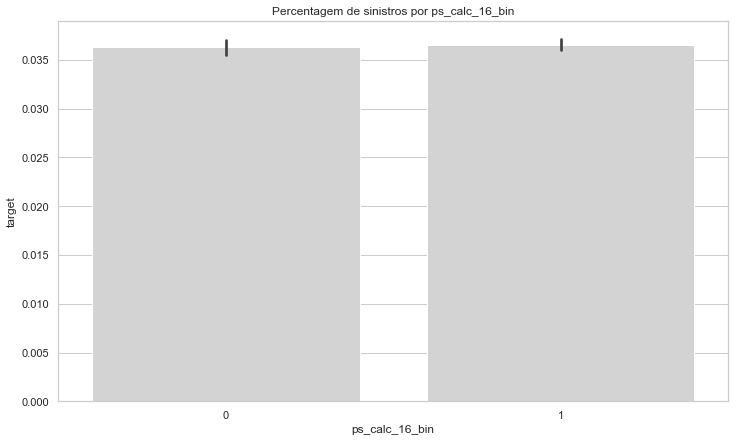

In [52]:
var = "ps_calc_16_bin"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_calc_17_bin')

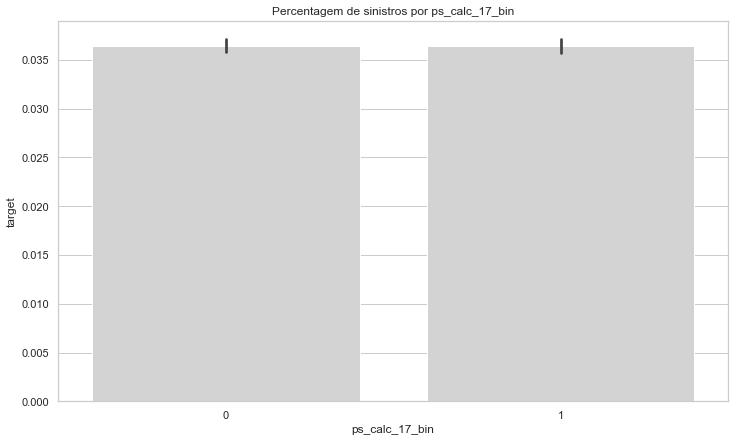

In [53]:
var = "ps_calc_17_bin"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_calc_18_bin')

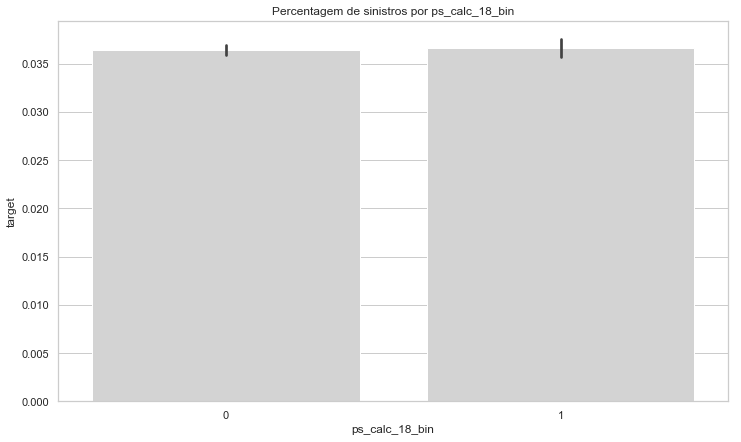

In [54]:
var = "ps_calc_18_bin"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_calc_19_bin')

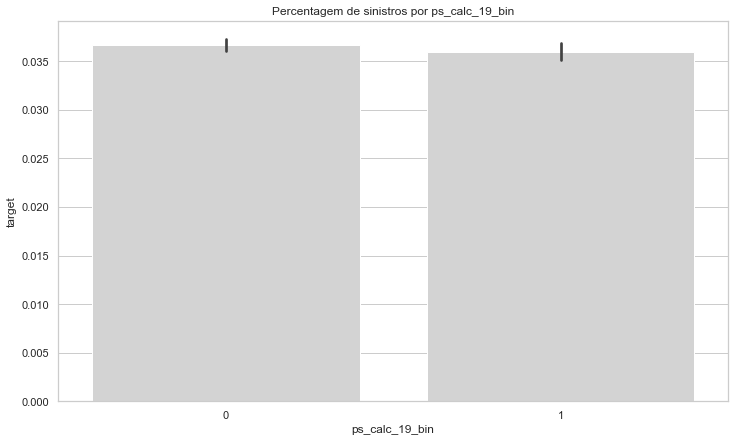

In [55]:
var = "ps_calc_19_bin"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_calc_20_bin')

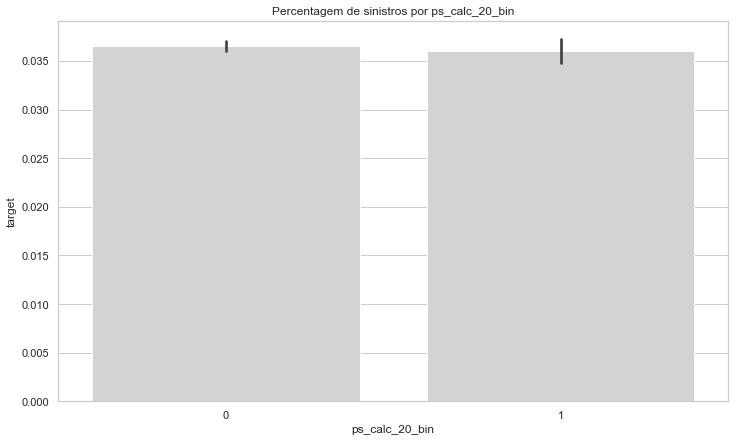

In [56]:
var = "ps_calc_20_bin"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_car_11_cat_A')

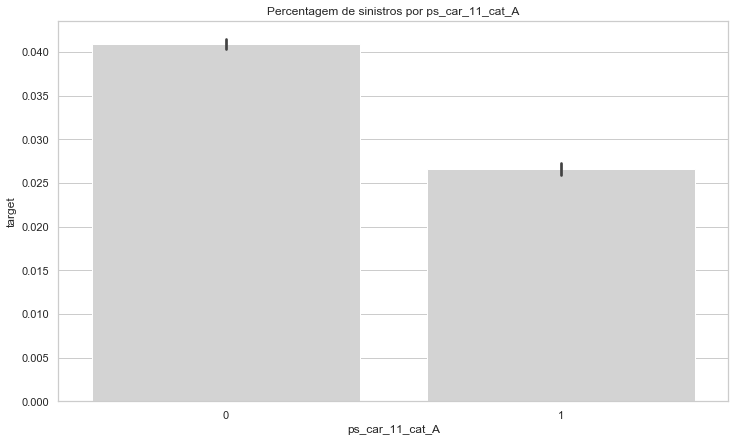

In [57]:
var = "ps_car_11_cat_A"

ax = sns.barplot(x=var, 
                 y="target", 
                 data=dados,
                 color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_car_11_cat_B')

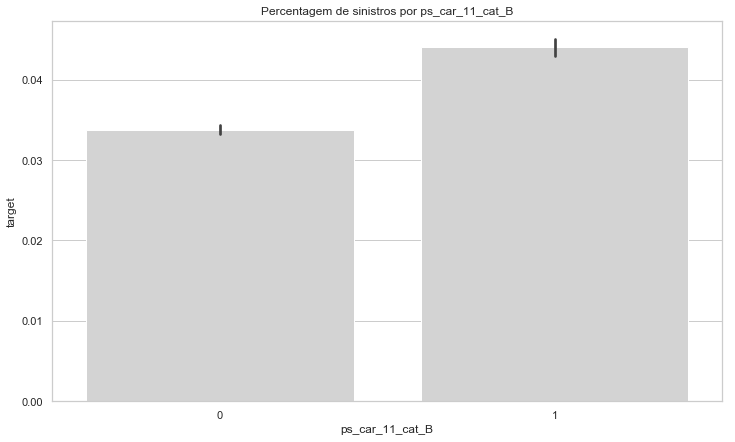

In [58]:
var = "ps_car_11_cat_B"

ax = sns.barplot(x=var, 
                 y="target", 
                 data=dados,
                 color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_car_11_cat_C')

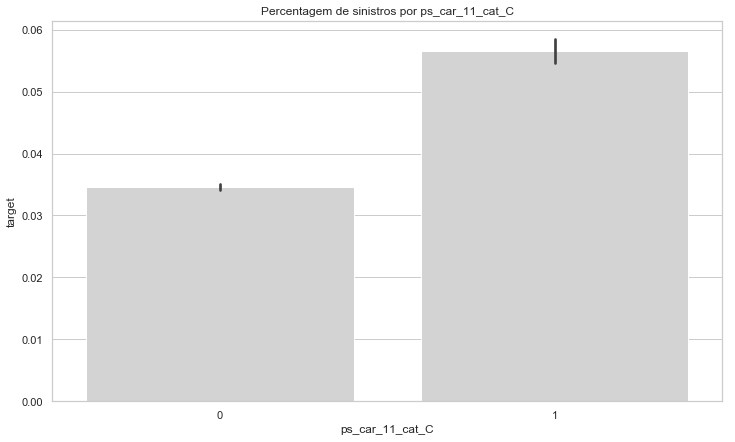

In [59]:
var = "ps_car_11_cat_C"

ax = sns.barplot(x=var, 
                 y="target", 
                 data=dados,
                 color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

# Variáveis Ordinais e Contínuas

Text(0.5,1,'Percentagem de sinistros por ps_ind_01')

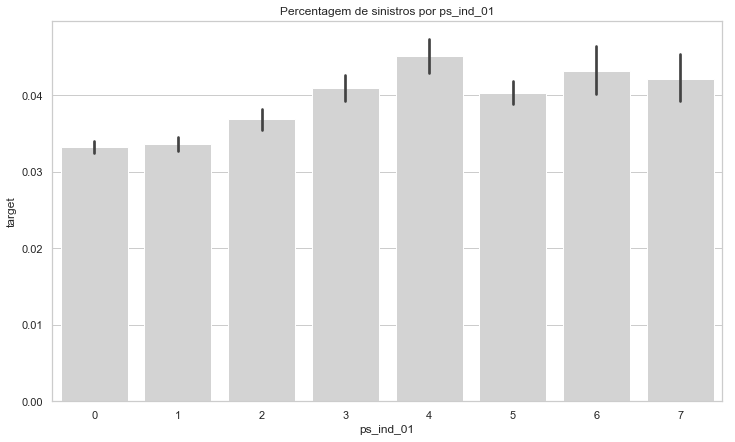

In [60]:
var = "ps_ind_01"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_ind_03')

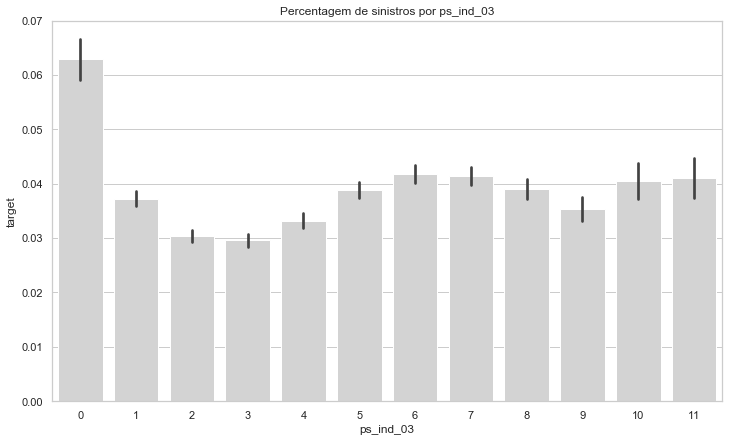

In [61]:
var = "ps_ind_03"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_ind_14')

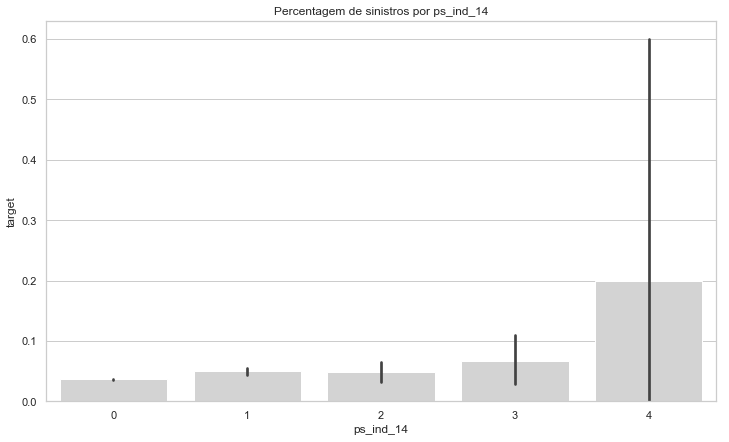

In [62]:
var = "ps_ind_14"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_ind_15')

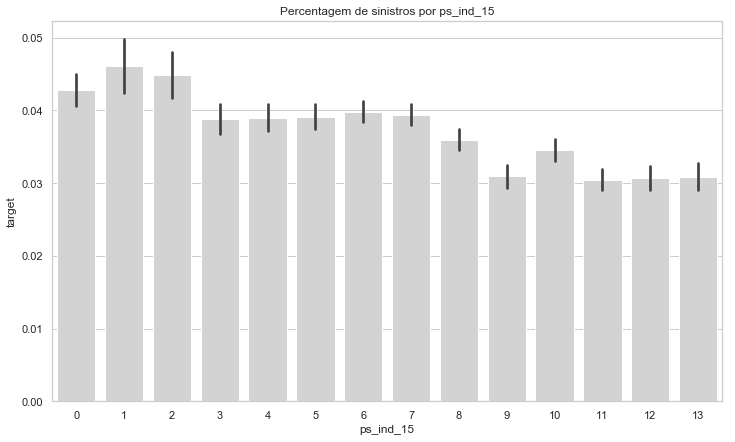

In [63]:
var = "ps_ind_15"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_reg_01')

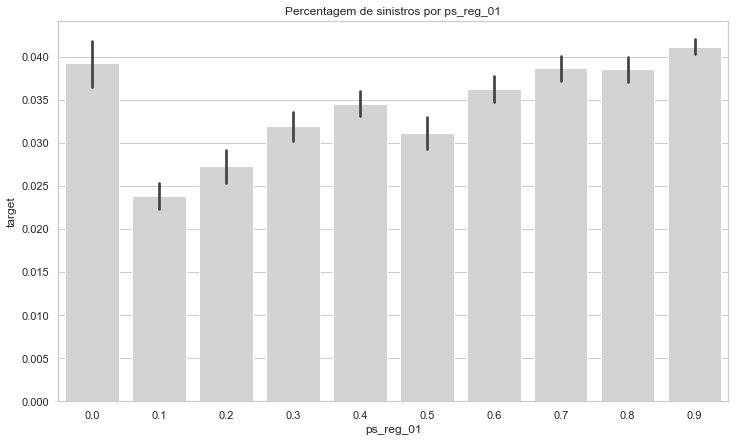

In [64]:
var = "ps_reg_01"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_reg_02')

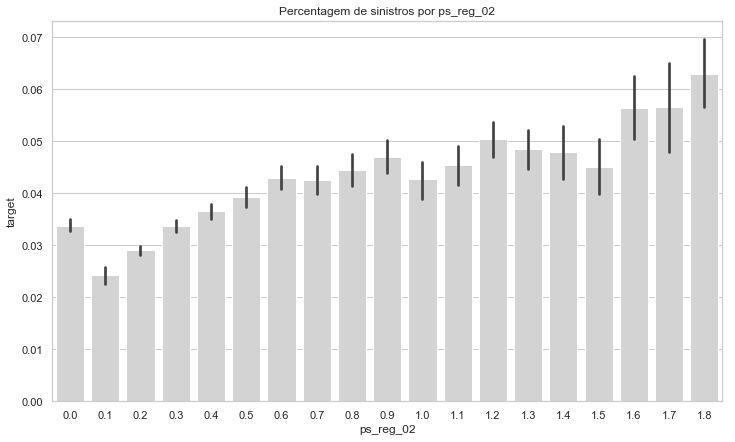

In [65]:
var = "ps_reg_02"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_car_11')

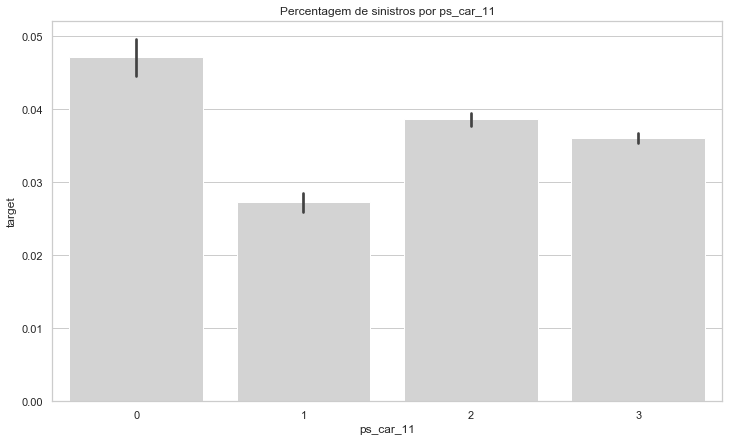

In [115]:
var = "ps_car_11"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_car_15')

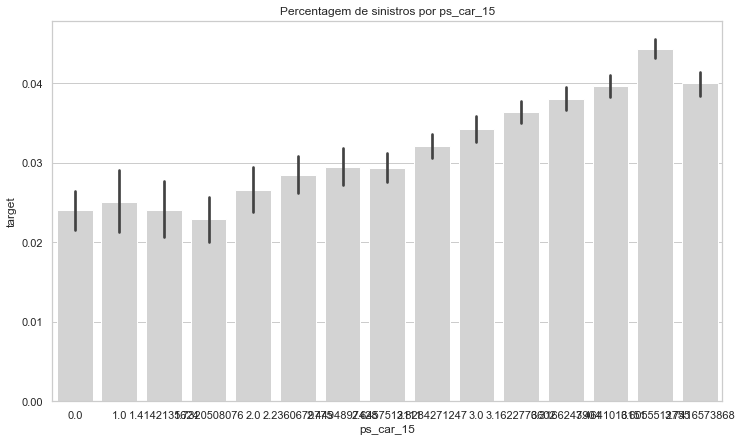

In [67]:
var = "ps_car_15"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_calc_01')

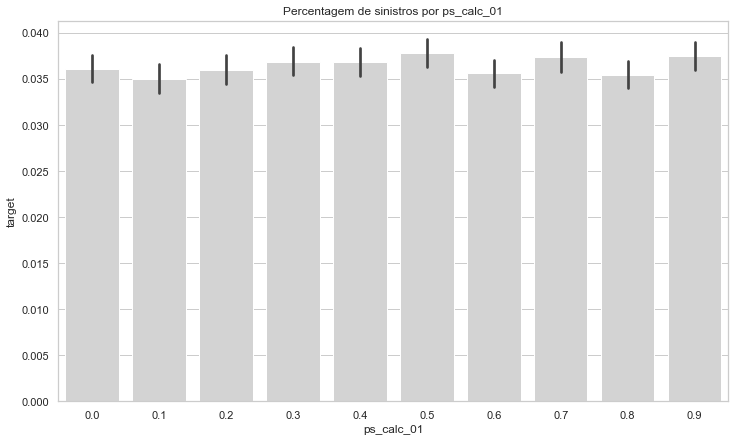

In [68]:
var = "ps_calc_01"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_calc_02')

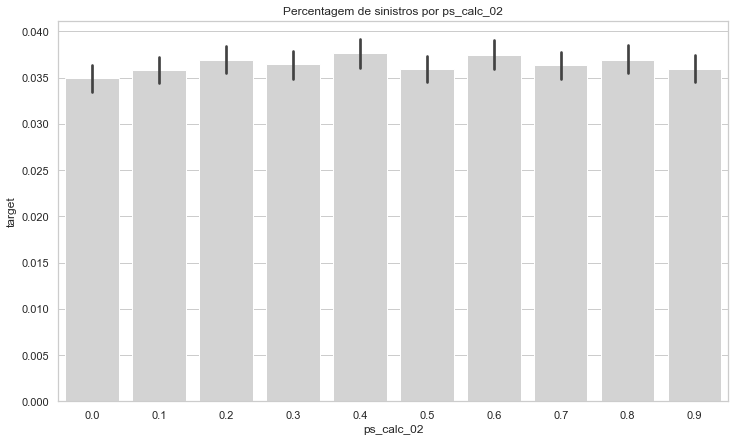

In [69]:
var = "ps_calc_02"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_calc_03')

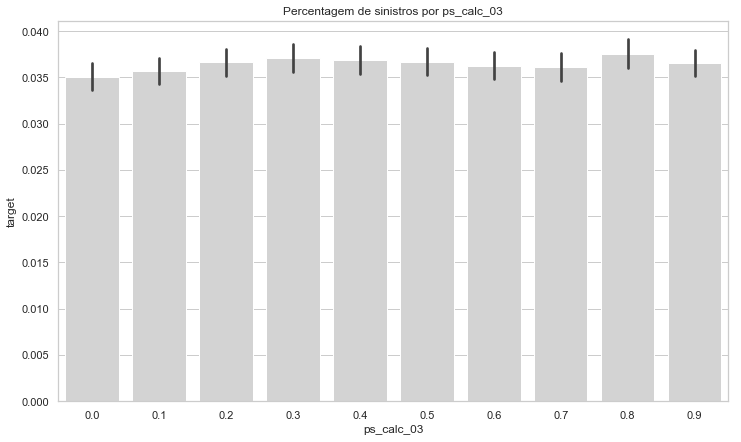

In [70]:
var = "ps_calc_03"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_calc_04')

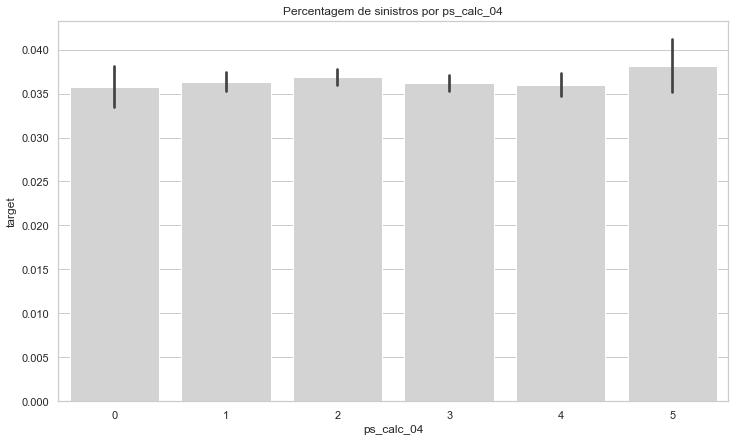

In [71]:
var = "ps_calc_04"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_calc_05')

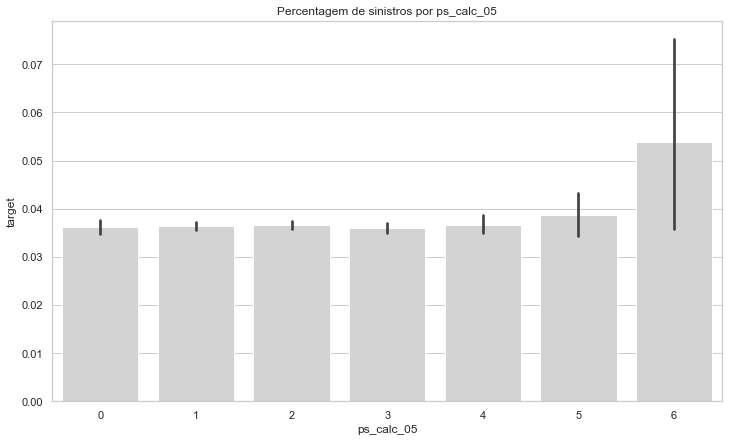

In [72]:
var = "ps_calc_05"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_calc_06')

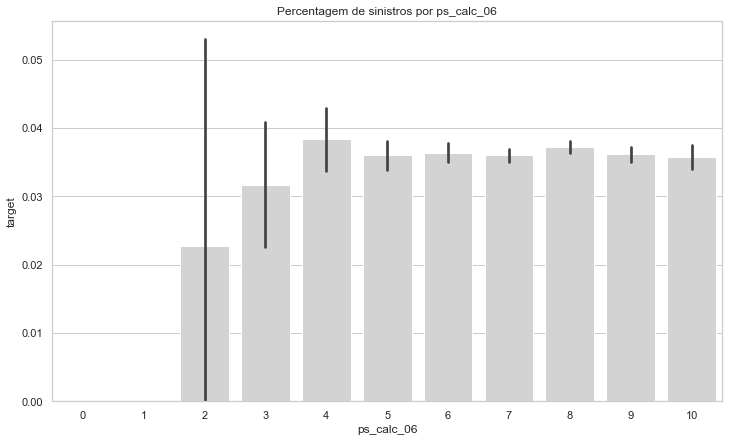

In [73]:
var = "ps_calc_06"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_calc_07')

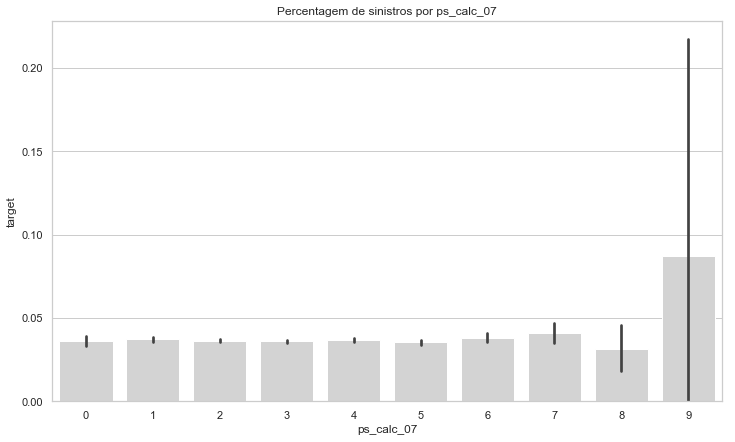

In [74]:
var = "ps_calc_07"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_calc_08')

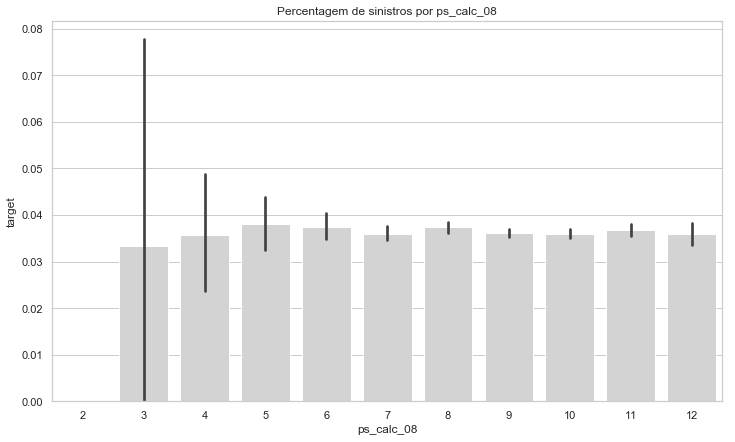

In [75]:
var = "ps_calc_08"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_calc_09')

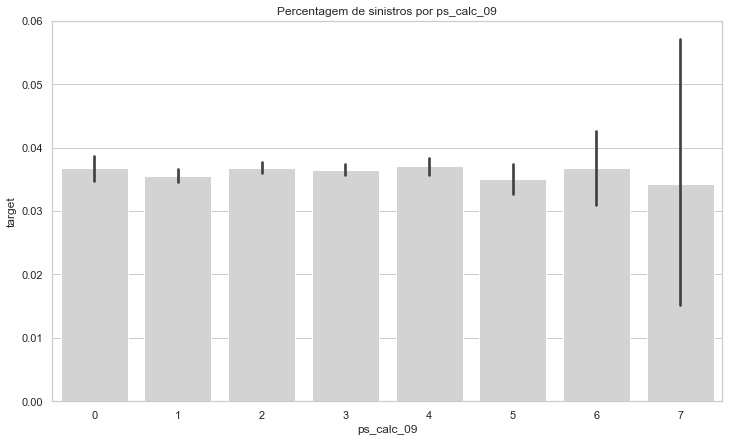

In [76]:
var = "ps_calc_09"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_calc_10')

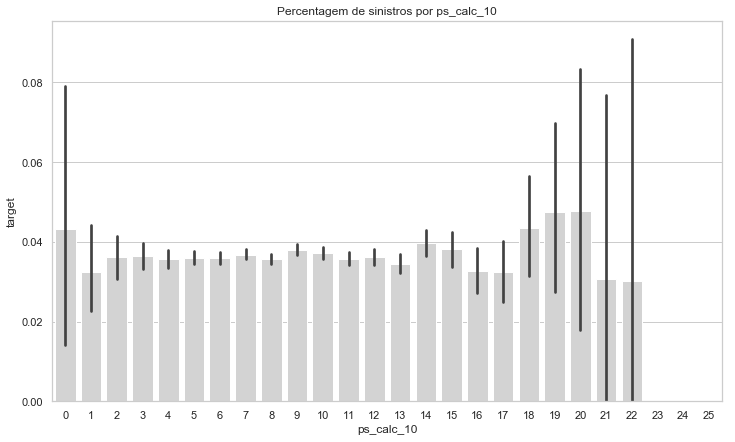

In [77]:
var = "ps_calc_10"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_calc_11')

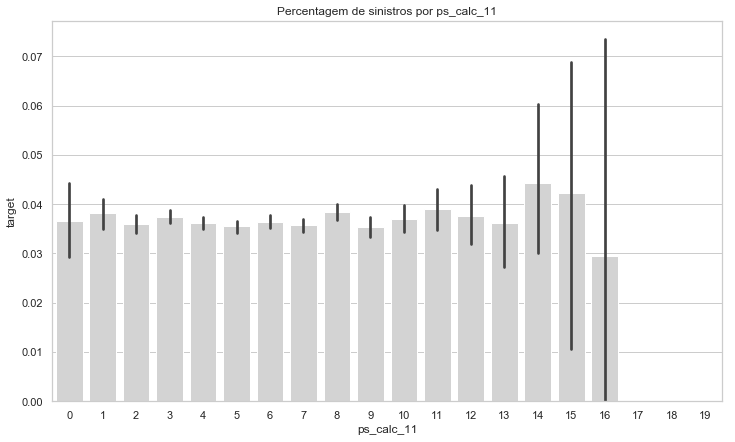

In [78]:
var = "ps_calc_11"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_calc_12')

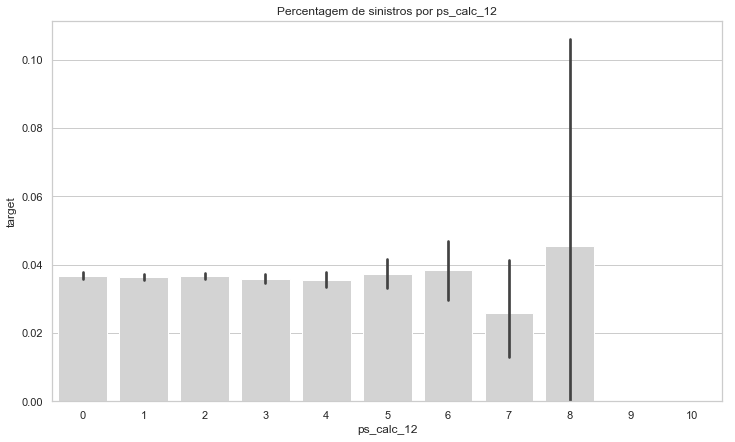

In [79]:
var = "ps_calc_12"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_calc_13')

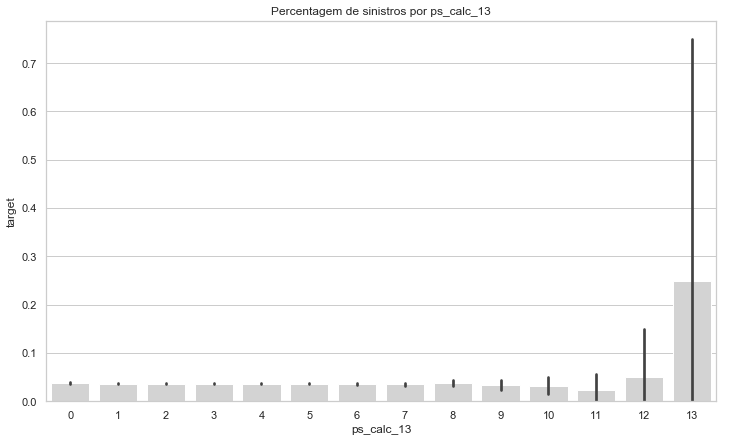

In [80]:
var = "ps_calc_13"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

Text(0.5,1,'Percentagem de sinistros por ps_calc_14')

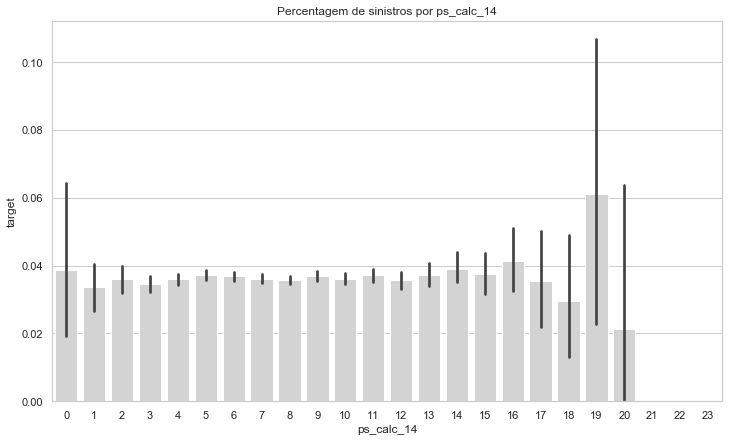

In [81]:
var = "ps_calc_14"

ax = sns.barplot(x=var, y="target", data=dados, color="lightgrey")
ax.set_title("Percentagem de sinistros por "+ var)

### ps_reg_03

Text(0.5,1,'Histograma de ps_reg_03_no_out')

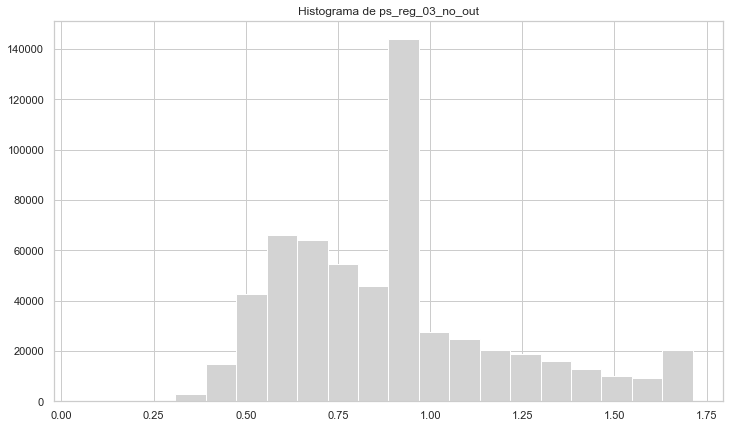

In [82]:
var = "ps_reg_03_no_out"

dados[var].hist(bins=20, color="lightgrey").set_title("Histograma de "+ var)

Text(0.5,1,'Boxplot de ps_reg_03_no_out')

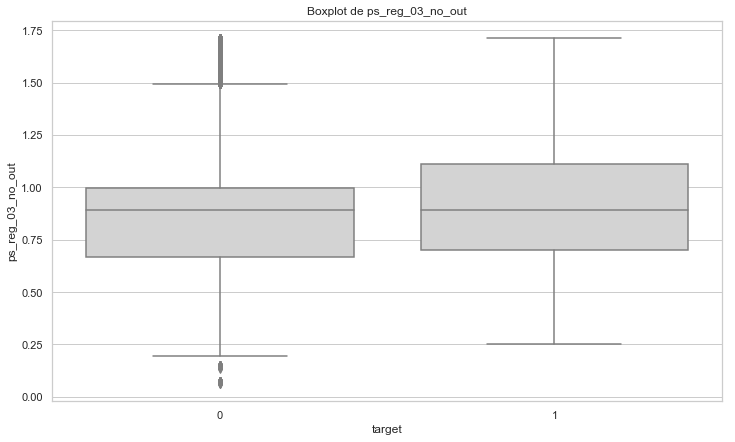

In [83]:
var = "ps_reg_03_no_out"

sns.boxplot(x="target", y=var,  data=dados, color="lightgrey").set_title("Boxplot de "+ var)

### ps_car_12

Text(0.5,1,'Histograma de ps_car_12_no_out')

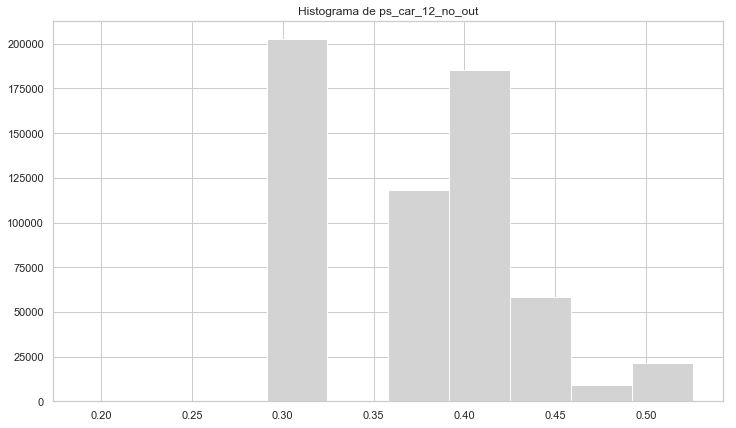

In [84]:
var = "ps_car_12_no_out"

dados[var].hist(color="lightgrey").set_title("Histograma de "+ var)

Text(0.5,1,'Boxplot de ps_car_12_no_out')

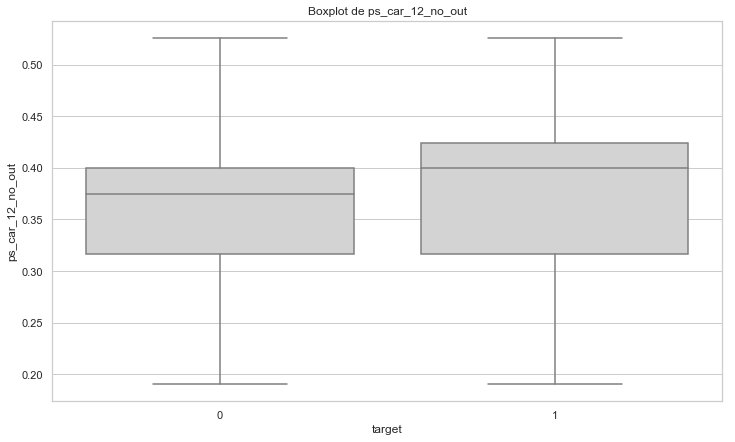

In [85]:
var = "ps_car_12_no_out"

sns.boxplot(x="target", y=var,  data=dados, color="lightgrey").set_title("Boxplot de "+ var)

### ps_car_13

Text(0.5,1,'Histograma de ps_car_13_no_out')

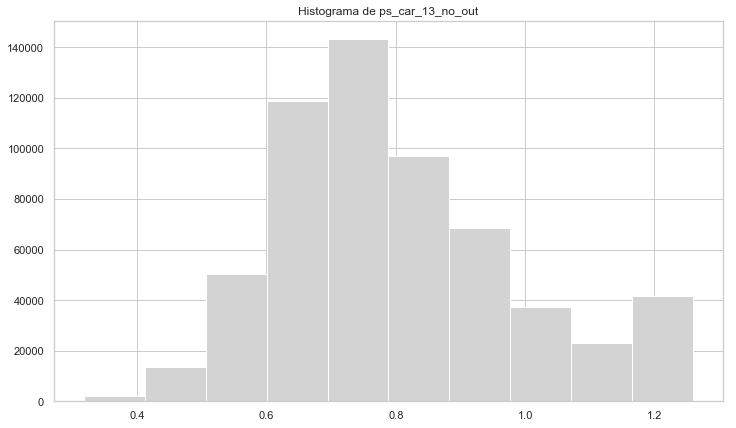

In [86]:
var = "ps_car_13_no_out"

dados[var].hist(color="lightgrey").set_title("Histograma de "+ var)

Text(0.5,1,'Boxplot de ps_car_13_no_out')

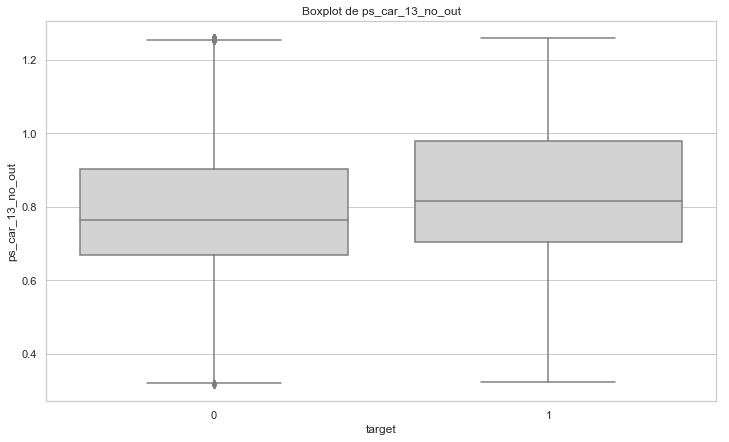

In [87]:
var = "ps_car_13_no_out"

sns.boxplot(x="target", y=var,  data=dados, color="lightgrey").set_title("Boxplot de "+ var)

### ps_car_14

Text(0.5,1,'Histograma de ps_car_14_no_out')

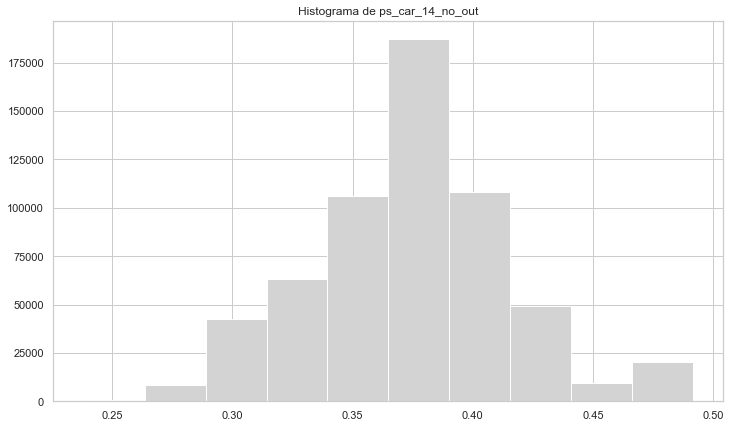

In [88]:
var = "ps_car_14_no_out"

dados[var].hist(color="lightgrey").set_title("Histograma de "+ var)

Text(0.5,1,'Boxplot de ps_car_14_no_out')

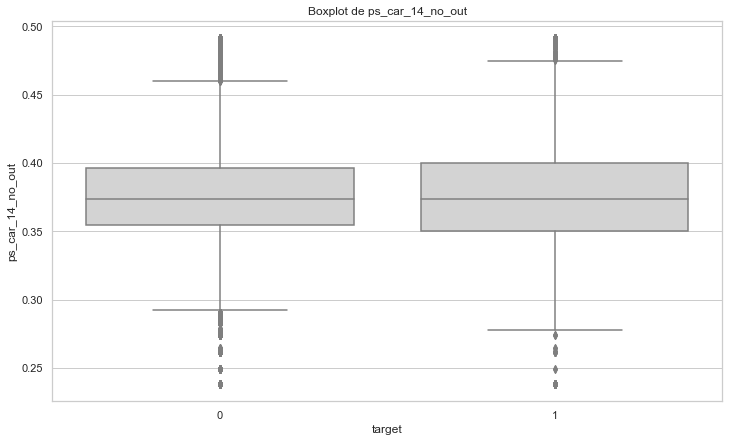

In [89]:
var = "ps_car_14_no_out"

sns.boxplot(x="target", y=var,  data=dados, color="lightgrey").set_title("Boxplot de "+ var)

# Correlograma

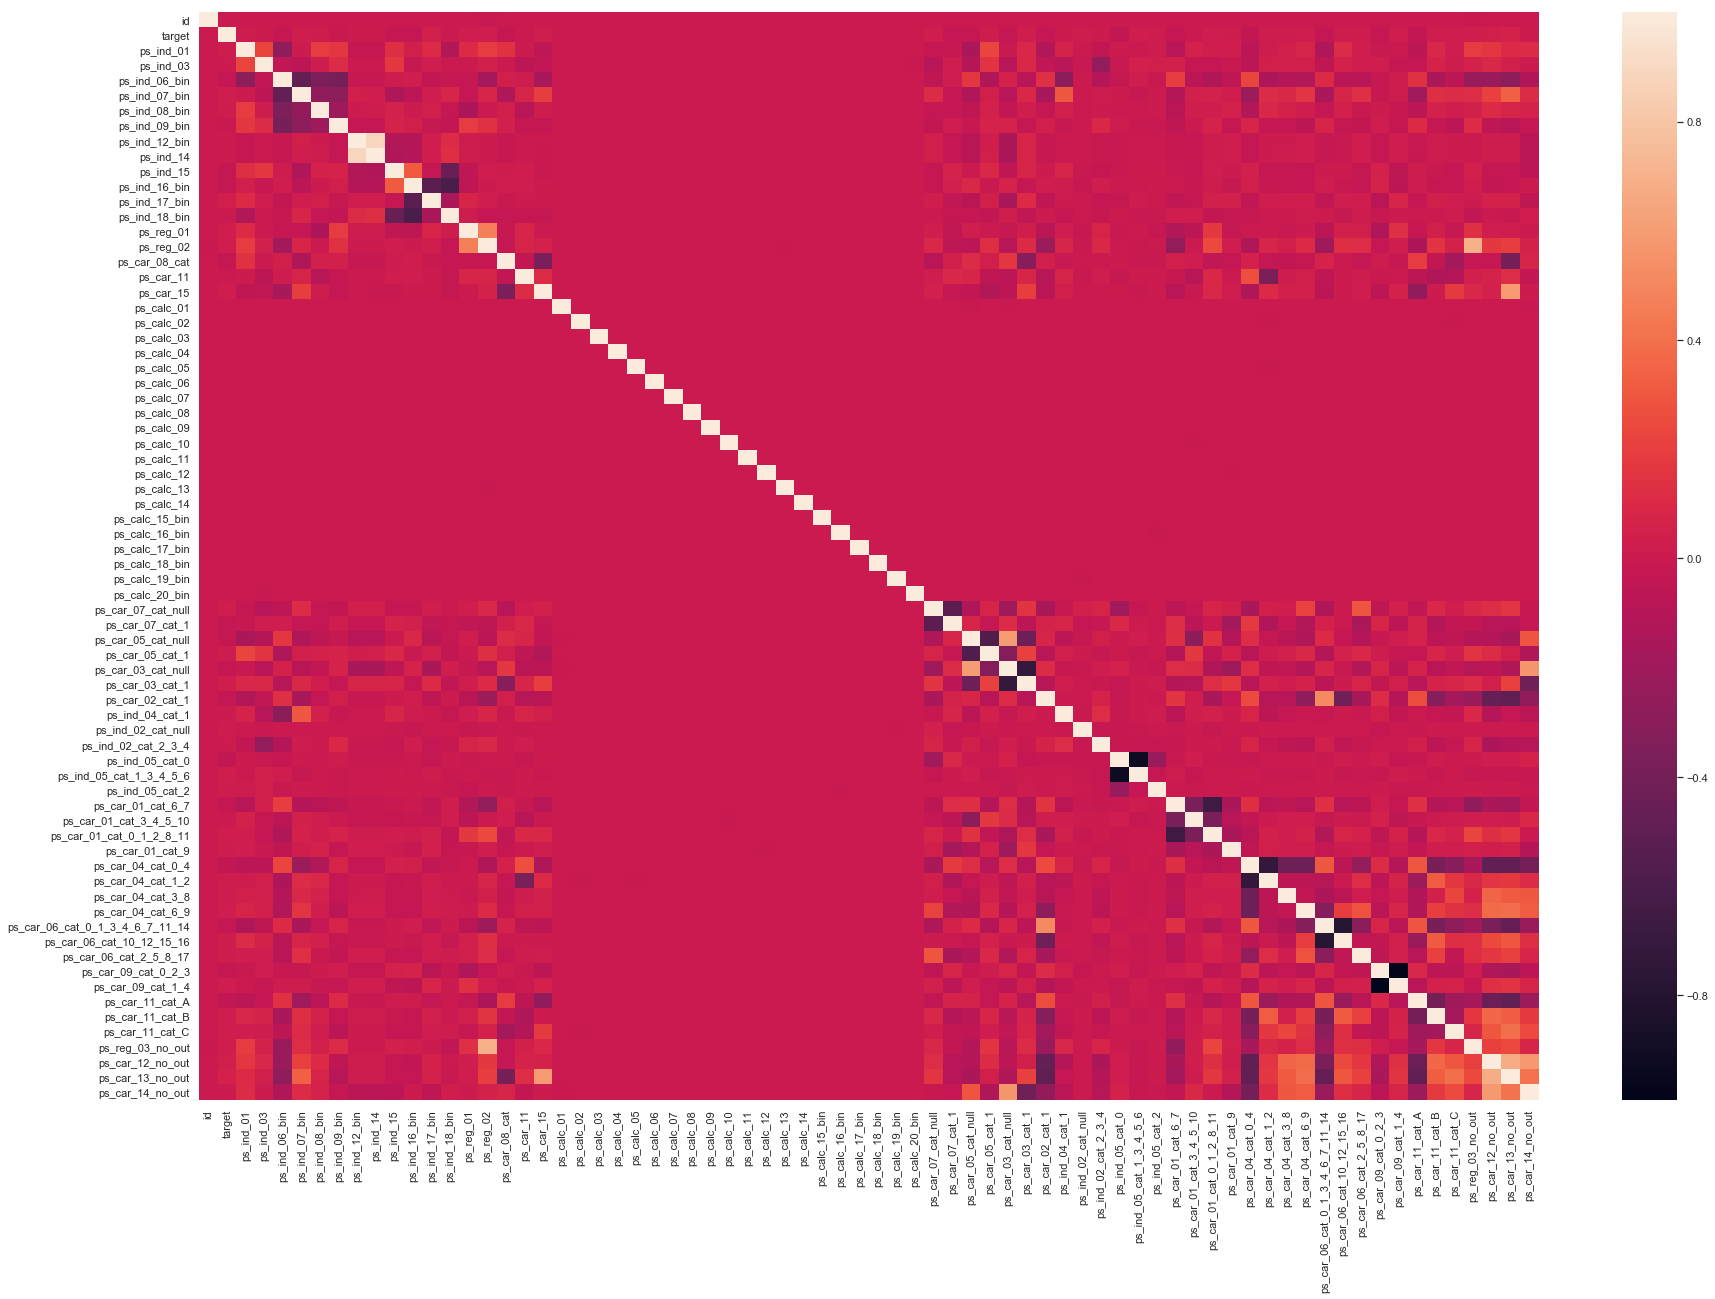

In [90]:
sns.set(rc={'figure.figsize':(30, 20)})

corr = dados.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [91]:
corr = dados.corr()
corr.style.background_gradient(cmap='coolwarm')

## Testando Regressão Logística

In [116]:
from sklearn.model_selection import train_test_split
dados_treino, dados_teste = train_test_split(dados, random_state=37, test_size=0.3)

In [117]:
X = dados_treino.drop(["id", "target"], 1)
y = dados_treino.loc[:, ["target"]]

X_teste = dados_teste.drop(["id", "target"], 1)
y_teste = dados_teste.loc[:, ["target"]]

In [118]:
import statsmodels.formula.api as sm

model = sm.Logit(y, X)
result = model.fit()
predictions = result.predict(X_teste)

Optimization terminated successfully.
         Current function value: 0.153064
         Iterations 8


In [119]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:               416648
Model:                          Logit   Df Residuals:                   416578
Method:                           MLE   Df Model:                           69
Date:                Sun, 21 Apr 2019   Pseudo R-squ.:                 0.02627
Time:                        18:06:24   Log-Likelihood:                -63774.
converged:                       True   LL-Null:                       -65494.
                                        LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
ps_ind_01                           0.0096      0.005      2.054      0.040       0.000       0.019
ps_ind_03                           0.0255      0.003      7.379    

In [120]:
from sklearn.metrics import roc_auc_score

acc = roc_auc_score(y_teste, predictions)
print("AUC na base de teste: %.4f" % acc) 
### valor anterior: 0.6197 --> é um ganho considerável, dado que o auc do vencedor da competição foi de 0,64849

acc = roc_auc_score(y, result.predict(X))
print("AUC na base de treino: %.4f" % acc) 

AUC na base de teste: 0.6272
AUC na base de treino: 0.6308


## Draft

In [93]:
pd.set_option('display.max_rows', 105)